In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [5]:
#Dropping Columns which are Empty more than 70% 
data = data.drop(["PoolQC","MiscFeature","Alley","Fence",'MasVnrType'], axis=1)

Creating New Features of the House

In [6]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']


In [7]:
data["TotalBath"] = data["FullBath"] + (0.5 * data["HalfBath"] + data["BsmtFullBath"] + (0.5 * data["BsmtHalfBath"]))

In [8]:
data["HouseAge"] = data["YrSold"] - data["YearBuilt"]
data["GarageAge"] = data["YrSold"] - data["GarageYrBlt"]

Representing whether house has Basement, Garage and Fireplace in  boolean format 


In [9]:
data['HasBasement'] = (data['TotalBsmtSF'] > 0).astype(int)
data['HasGarage'] = (data['GarageArea'] > 0).astype(int)
data['HasFireplace'] = (data['Fireplaces'] > 0).astype(int)


Imputing 'LotFrontage' column with the mean of 'LotFrontage' in that 'Neighborhood'

In [10]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))


One Hot Encoding Important categorical features such as Neighborhood, HouseStyle and SaleCondition

In [11]:
data = pd.get_dummies(data, columns=['SaleCondition','Neighborhood', 'HouseStyle','RoofStyle'], drop_first=True)
#'SaleCondition','Neighborhood',

In [12]:
data['MSSubClass'] = data['MSSubClass'].astype(str)  # Convert to categorical
data = pd.get_dummies(data, columns=['MSSubClass','MSZoning','LotConfig','BldgType'], drop_first=True)  # One-hot encode


Ordinally encoding the feature that describe quality

In [13]:
a=data["ExterQual"].unique()
b=data["KitchenQual"].unique()

print("External quality", a)
print("Kithen quality",b)

External quality ['Gd' 'TA' 'Ex' 'Fa']
Kithen quality ['Gd' 'TA' 'Ex' 'Fa']


In [14]:
quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
data['ExterQual'] = data['ExterQual'].map(quality_map)
data['KitchenQual'] = data['KitchenQual'].map(quality_map)


In [15]:
quality_map_2 = {'Y':1,'N':0}

data['CentralAir'] = data['CentralAir'].map(quality_map_2)

In [16]:
quality_map_3 =  {'Y':3,'P':2,'N':1}

data['PavedDrive'] = data['PavedDrive'].map(quality_map_3)

In [17]:
quality_map_4 = {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}

data['Utilities'] = data['Utilities'].map(quality_map_4)

In [18]:
quality_map_5 = {'Grvl':1,'Pave':2}

data['Street'] = data['Street'].map(quality_map_5)

In [19]:
data['Condition1'].isnull().sum()

0

In [20]:
quality_map_6 = {'Reg':4,'IR1':3,'IR2':2,'IR3':1}

data['LotShape']=data['LotShape'].map(quality_map_6)

In [21]:
quality_map_7 = {'Lvl': 2, 'Bnk': 1, 'HLS': 4, 'Low': 3}

data['LandContour'] = data['LandContour'].map(quality_map_7)

In [22]:
quality_map_8 = {'Gtl': 0, 'Mod': 1, 'Sev': 2}  
data['LandSlope'] = data['LandSlope'].map(quality_map_8)


<Axes: ylabel='Frequency'>

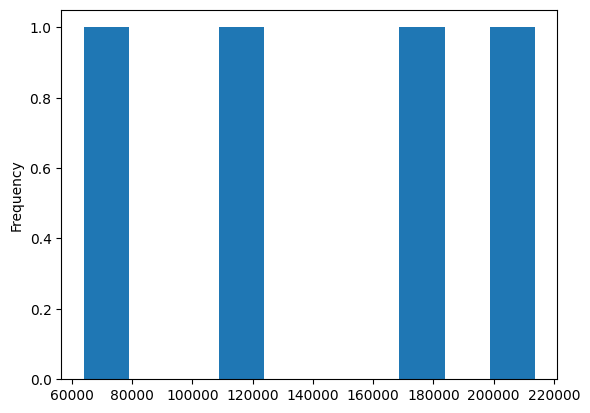

In [23]:
data.groupby('BsmtCond')['SalePrice'].mean().sort_values().plot(kind='hist')


In [24]:
quality_map_9 = {'Artery': 1, 'RRAe': 2,'Feedr':3,'RRAn':4,'Norm':5,'RRNe':6,'RRNn':7,'PosN':8,'PosA':9}  

data['Condition1'] = data['Condition1'].map(quality_map_9)

In [25]:
quality_map_10 = {'Artery': 2, 'RRAe': 6,'Feedr':3,'RRAn':4,'Norm':5,'RRNe':6,'RRNn':1,'PosN':8,'PosA':9}  
data['Condition2'] = data['Condition2'].map(quality_map_10)

Quality based Features

In [26]:

data['LivQual']=data['OverallQual'] * data['GrLivArea']

In [27]:
data['BsmtCond']=data['OverallCond'] * data['TotalBsmtSF'] 

Proportional Feature

In [28]:
data['RoadFaceLot'] = data['LotFrontage'] / data['LotArea'] 

In [29]:
data[['TotalSF', 'SalePrice']].corr()


,TotalSF,SalePrice
TotalSF,1.00000,0.78226
SalePrice,0.78226,1.00000


Target Encoding

In [30]:
#y = data['SalePrice']

Checking Collinearity

In [31]:
print(data.isnull().sum().sort_values(ascending=False))  # Shows count of NaN values per column


FireplaceQu     690
GarageFinish     81
GarageType       81
GarageCond       81
GarageQual       81
               ... 
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
RoadFaceLot       0
Length: 144, dtype: int64


For all garage related columns. The NA rows are constant thus assuming Values with 0 assuming these do not exist

In [32]:
data['GarageAge'] = data['GarageAge'].fillna(0)
#data['GarageAge'].isnull().sum()

In [33]:
data[['HasBasement', 'HasGarage', 'HasFireplace']].dtypes

HasBasement     int64
HasGarage       int64
HasFireplace    int64
dtype: object

In [34]:
print((data == -np.inf).sum().sum())  # Checks if there are any infinite values


0


In [35]:
#data = data.replace([np.inf, -np.inf], np.nan).dropna()


In [36]:
data

,Id,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Condition1,Condition2,...,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LivQual,RoadFaceLot
0,1,65.0,8450,2,4,2,4,0,5,5,...,False,False,False,True,False,False,False,False,11970,0.007692
1,2,80.0,9600,2,4,2,4,0,3,5,...,False,True,False,False,False,False,False,False,7572,0.008333
2,3,68.0,11250,2,3,2,4,0,5,5,...,False,False,False,True,False,False,False,False,12502,0.006044
3,4,60.0,9550,2,3,2,4,0,5,5,...,False,False,False,False,False,False,False,False,12019,0.006283
4,5,84.0,14260,2,3,2,4,0,5,5,...,False,True,False,False,False,False,False,False,17584,0.005891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,2,4,2,4,0,5,5,...,False,False,False,True,False,False,False,False,9882,0.007831
1456,1457,85.0,13175,2,4,2,4,0,5,5,...,False,False,False,True,False,False,False,False,12438,0.006452
1457,1458,66.0,9042,2,4,2,4,0,5,5,...,False,False,False,True,False,False,False,False,16380,0.007299
1458,1459,68.0,9717,2,4,2,4,0,5,5,...,False,False,False,True,False,False,False,False,5390,0.006998


In [37]:
#data = data.apply(pd.to_numeric, errors='coerce')  # Convert everything to numeric, turn errors into NaN


In [38]:
print(data.isnull().sum().sum())  # If it's > 0, fill or drop NaNs


1254


In [39]:
#data = data.loc[:, data.nunique() > 1]  # Remove columns with only one unique value

bool_cols = data.select_dtypes(include=['bool']).columns
for i in bool_cols:
    data[i] = data[i].astype(int)
#df[bool_cols] = df[bool_cols].astype(int)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical features
data = data.select_dtypes(include=[np.number])#.drop(columns=['SalePrice'], errors='ignore')

In [41]:
#print(X.dtypes.value_counts())  
data = data.replace([np.inf, -np.inf], np.nan).dropna()
X = data.select_dtypes(include=[np.number]).drop(columns=['SalePrice'], errors='ignore')
X2 = data.select_dtypes(include=[np.number]).drop(columns=['SalePrice'], errors='ignore')


In [42]:
X2

,Id,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Condition1,Condition2,...,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LivQual,RoadFaceLot
0,1,65.0,8450,2,4,2,4,0,5,5,...,0,0,0,1,0,0,0,0,11970,0.007692
1,2,80.0,9600,2,4,2,4,0,3,5,...,0,1,0,0,0,0,0,0,7572,0.008333
2,3,68.0,11250,2,3,2,4,0,5,5,...,0,0,0,1,0,0,0,0,12502,0.006044
3,4,60.0,9550,2,3,2,4,0,5,5,...,0,0,0,0,0,0,0,0,12019,0.006283
4,5,84.0,14260,2,3,2,4,0,5,5,...,0,1,0,0,0,0,0,0,17584,0.005891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,2,4,2,4,0,5,5,...,0,0,0,1,0,0,0,0,9882,0.007831
1456,1457,85.0,13175,2,4,2,4,0,5,5,...,0,0,0,1,0,0,0,0,12438,0.006452
1457,1458,66.0,9042,2,4,2,4,0,5,5,...,0,0,0,1,0,0,0,0,16380,0.007299
1458,1459,68.0,9717,2,4,2,4,0,5,5,...,0,0,0,1,0,0,0,0,5390,0.006998


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display results
print(vif_data)


             Feature        VIF
0                 Id   1.109103
1        LotFrontage   2.964163
2            LotArea   2.271537
3             Street   1.424182
4           LotShape   1.605159
..               ...        ...
119  BldgType_Duplex        inf
120   BldgType_Twnhs  16.936941
121  BldgType_TwnhsE  42.717685
122          LivQual  63.035248
123      RoadFaceLot   2.507001

[124 rows x 2 columns]


Dropping Features with high collinearity

In [44]:
X = X.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',"GarageYrBlt","YearRemodAdd",
                    "YrSold","YearBuilt", "BsmtFinSF1","BsmtFinSF2" ,"BsmtUnfSF","TotalBsmtSF",
                    "1stFlrSF" ,"2ndFlrSF", "GarageCars","GrLivArea"])
X = X.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd'], axis = 1)
X = X.drop(['KitchenAbvGr','BedroomAbvGr','BldgType_2fmCon','BldgType_Duplex', 'LotConfig_FR2',
            'LotConfig_FR3','LotConfig_Inside','BldgType_Twnhs','BldgType_TwnhsE','LotConfig_CulDSac'],axis = 1)


# Outlier Handling

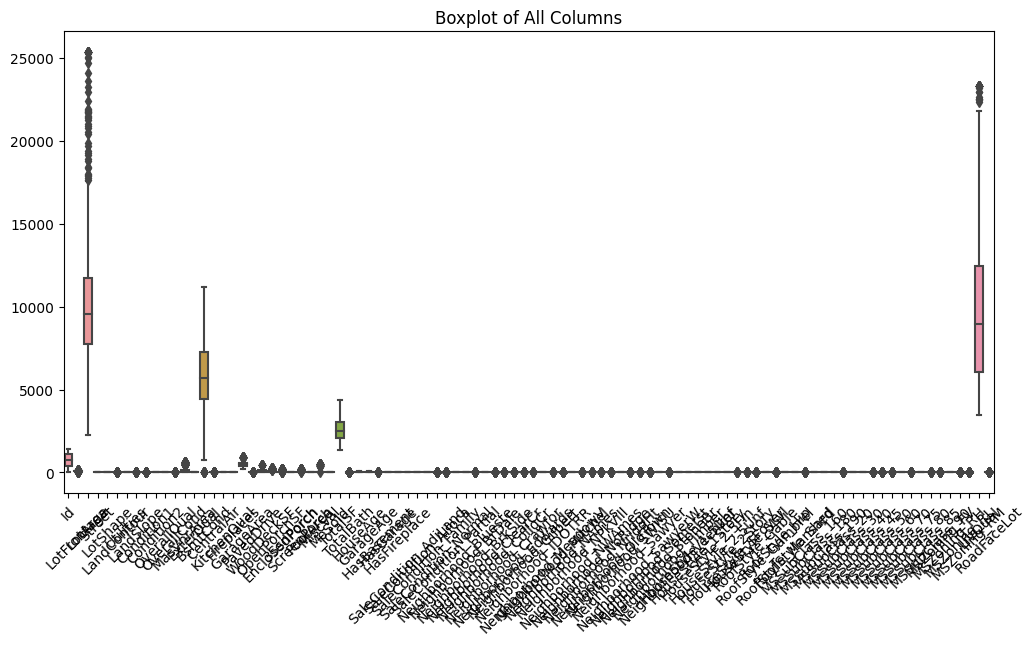

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.boxplot(data=X)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("Boxplot of All Columns")
plt.show()


In [49]:
from scipy.stats.mstats import winsorize

def winsorize_data(X, cols, lower=0.02, upper=0.98):
    for col in cols:
        X[col] = winsorize(X[col], limits=[lower, 1-upper])
    return X

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
X = winsorize_data(X, numeric_cols)


In [50]:
from scipy.stats.mstats import winsorize

def winsorize_data(X2, cols, lower=0.02, upper=0.98):
    for col in cols:
        X2[col] = winsorize(X2[col], limits=[lower, 1-upper])
    return X2

numeric_cols = X2.select_dtypes(include=["int64", "float64"]).columns
X2 = winsorize_data(X2, numeric_cols)


Using Cooks Distance to find outliers with high influence 

In [51]:
corr_matrix = X.corr().abs()
high_corr_pairs = corr_matrix[corr_matrix > 0.5]  # Show correlations above 90%
print(high_corr_pairs)


              Id  LotFrontage   LotArea  Street  LotShape  LandContour  \
Id           1.0          NaN       NaN     NaN       NaN          NaN   
LotFrontage  NaN     1.000000  0.563424     NaN       NaN          NaN   
LotArea      NaN     0.563424  1.000000     NaN       NaN          NaN   
Street       NaN          NaN       NaN     NaN       NaN          NaN   
LotShape     NaN          NaN       NaN     NaN       1.0          NaN   
...          ...          ...       ...     ...       ...          ...   
MSZoning_RH  NaN          NaN       NaN     NaN       NaN          NaN   
MSZoning_RL  NaN          NaN       NaN     NaN       NaN          NaN   
MSZoning_RM  NaN          NaN       NaN     NaN       NaN          NaN   
LivQual      NaN          NaN       NaN     NaN       NaN          NaN   
RoadFaceLot  NaN          NaN  0.726332     NaN       NaN          NaN   

             Utilities  LandSlope  Condition1  Condition2  ...  MSSubClass_75  \
Id                 NaN        

Rerunning The VIF test

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


        Feature        VIF
0            Id   1.064612
1   LotFrontage   4.841021
2       LotArea   7.269648
3        Street   0.000000
4      LotShape   1.392169
..          ...        ...
91  MSZoning_RH        NaN
92  MSZoning_RL  14.460739
93  MSZoning_RM  11.494761
94      LivQual  35.497368
95  RoadFaceLot   5.377390

[96 rows x 2 columns]


Some Features have VIF > 10 but we will proceed for now and may apply the PCA later

# Feature Scaling

In [53]:
#X = X.drop(['HasFireplace','HasBasement','HasGarage'], axis = 1)

X = X.drop(['Id','HouseStyle_2.5Fin'], axis = 1) #,'TotRmsAbvGrd'
#,'SaleCondition_AdjLand','HouseStyle_2.5Fin','MSSubClass_180','MSZoning_RH'
X2 = X2.drop(['Id','HouseStyle_2.5Fin'], axis = 1)

Running VIF again

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]


vifdf = pd.DataFrame(vif_data.sort_values(by="VIF", ascending=False))


In [55]:
vifdf.head(20)

,Feature,VIF
92,LivQual,35.486005
27,TotalSF,32.403710
66,HouseStyle_2Story,23.441678
82,MSSubClass_60,20.033608
64,HouseStyle_1Story,17.889143
90,MSZoning_RL,14.459107
13,BsmtCond,12.860105
29,HouseAge,12.169940
68,HouseStyle_SLvl,11.792150
91,MSZoning_RM,11.488375


In [56]:
import pandas as pd

# Compute correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix (to avoid duplicate pairs)
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape, dtype=bool)))

# Find pairs with correlation above a threshold (e.g., 0.9)
high_corr_pairs = [(col, idx) for col in upper.columns for idx in upper.index if upper.loc[idx, col] > 0.65]

# Display results
print("Highly correlated feature pairs (correlation > 0.65):")
print(high_corr_pairs)

Highly correlated feature pairs (correlation > 0.65):
[('ExterQual', 'OverallQual'), ('KitchenQual', 'OverallQual'), ('KitchenQual', 'ExterQual'), ('TotalSF', 'OverallQual'), ('TotalSF', 'BsmtCond'), ('GarageAge', 'HouseAge'), ('HasFireplace', 'Fireplaces'), ('SaleCondition_Partial', 'SaleCondition_Normal'), ('HouseStyle_2Story', 'HouseStyle_1Story'), ('RoofStyle_Hip', 'RoofStyle_Gable'), ('MSSubClass_20', 'HouseStyle_1Story'), ('MSSubClass_60', 'HouseStyle_2Story'), ('MSSubClass_80', 'HouseStyle_SLvl'), ('MSZoning_FV', 'Neighborhood_Somerst'), ('MSZoning_RM', 'MSZoning_RL'), ('LivQual', 'OverallQual'), ('LivQual', 'TotalSF'), ('RoadFaceLot', 'LotArea')]


Dropping Columns with multiple high correlation and low importance


In [57]:
cols_to_drop = ['ExterQual', 'KitchenQual', 'GarageAge','HasFireplace']

X.drop(columns=cols_to_drop, inplace=True)


# Skewness Transformation for selective columns

In [58]:
check_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 
   'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
   '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'TotalSF', 
   'TotalBath','HouseAge','LotFrontage']


In [59]:
import numpy as np
from scipy.stats import boxcox


for col in check_list:
    skew_value = X[col].skew()
    if skew_value > 2:  # Highly right-skewed
        X[col], _ = boxcox(X[col] + 1)  # Box-Cox (only for positive values)
    elif skew_value > 1:  # Moderately right-skewed
        X[col] = np.log1p(X[col])  # Log transform
    elif skew_value > 0.5:  # Mildly right-skewed
        X[col] = np.sqrt(X[col])  # Square root transform
    elif skew_value < -1:  # Moderately left-skewed
        X[col] = X[col] ** 2  # Squaring
    elif skew_value < -2:  # Highly left-skewed
        X[col] = X[col] ** 3  # Cubing



# Checking skewness again
print(X.skew())

LotFrontage    0.064040
LotArea       -0.829197
Street         0.000000
LotShape      -0.969649
LandContour    2.583468
                 ...   
MSZoning_RH    0.000000
MSZoning_RL   -1.497087
MSZoning_RM    2.068047
LivQual        0.930181
RoadFaceLot    0.655030
Length: 90, dtype: float64


# Standard Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features


# Principle Component Analysis(PCA)

In [61]:
from sklearn.decomposition import PCA

# Define the number of components (or use None to keep all)
pca = PCA(n_components=None)  
X_pca = pca.fit_transform(X_scaled)  # Transform data into principal components


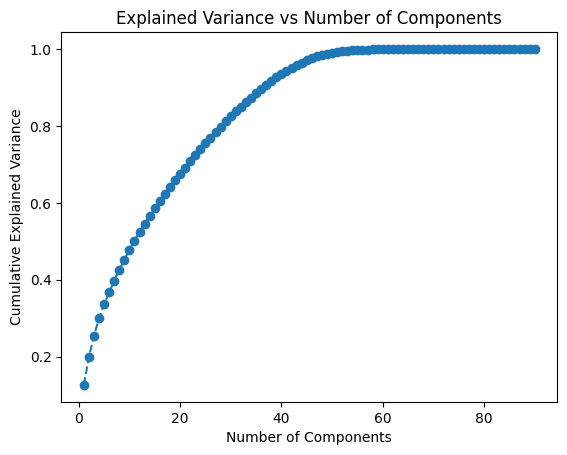

In [62]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()


In [63]:
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)

In [64]:
X#_pca

,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Condition1,Condition2,OverallQual,...,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LivQual,RoadFaceLot
0,65.0,9.042040,2,4,2,4,0,5,5,7,...,0,0,0,0,0,0,1,0,11970,0.007692
1,80.0,9.169623,2,4,2,4,0,3,5,6,...,0,0,0,0,0,0,1,0,7572,0.008333
2,68.0,9.328212,2,3,2,4,0,5,5,7,...,0,0,0,0,0,0,1,0,12502,0.006044
3,60.0,9.164401,2,3,2,4,0,5,5,7,...,0,0,0,0,0,0,1,0,12019,0.006283
4,84.0,9.565284,2,3,2,4,0,5,5,8,...,0,0,0,0,0,0,1,0,17584,0.005891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,8.976894,2,4,2,4,0,5,5,6,...,0,0,0,0,0,0,1,0,9882,0.007831
1456,85.0,9.486152,2,4,2,4,0,5,5,6,...,0,0,0,0,0,0,1,0,12438,0.006452
1457,66.0,9.109746,2,4,2,4,0,5,5,7,...,0,0,0,0,0,0,1,0,16380,0.007299
1458,68.0,9.181735,2,4,2,4,0,5,5,5,...,0,0,0,0,0,0,1,0,5390,0.006998


# Normal Linear Regression

In [65]:
from sklearn.model_selection import train_test_split

#X = data.drop(['SalePrice', 'Id'], axis=1)
y = data['SalePrice']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
X

,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Condition1,Condition2,OverallQual,...,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LivQual,RoadFaceLot
0,65.0,9.042040,2,4,2,4,0,5,5,7,...,0,0,0,0,0,0,1,0,11970,0.007692
1,80.0,9.169623,2,4,2,4,0,3,5,6,...,0,0,0,0,0,0,1,0,7572,0.008333
2,68.0,9.328212,2,3,2,4,0,5,5,7,...,0,0,0,0,0,0,1,0,12502,0.006044
3,60.0,9.164401,2,3,2,4,0,5,5,7,...,0,0,0,0,0,0,1,0,12019,0.006283
4,84.0,9.565284,2,3,2,4,0,5,5,8,...,0,0,0,0,0,0,1,0,17584,0.005891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,8.976894,2,4,2,4,0,5,5,6,...,0,0,0,0,0,0,1,0,9882,0.007831
1456,85.0,9.486152,2,4,2,4,0,5,5,6,...,0,0,0,0,0,0,1,0,12438,0.006452
1457,66.0,9.109746,2,4,2,4,0,5,5,7,...,0,0,0,0,0,0,1,0,16380,0.007299
1458,68.0,9.181735,2,4,2,4,0,5,5,5,...,0,0,0,0,0,0,1,0,5390,0.006998


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

Using Cook's Distance to find highly influential outliers

In [73]:
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

# Fit an OLS model to calculate Cook's Distance
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
influence = OLSInfluence(model)

# Get Cook's Distance
cooks_d = influence.cooks_distance[0]

# Identify high influence points (threshold = 4/n)
influential_points = cooks_d > (4 / len(X_train))
print("Number of Influential Points:", sum(influential_points))


Number of Influential Points: 28


In [77]:
# Train model
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

# Predictions
y_pred = lrmodel.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Root Mean Squared Error: 24508.3468000146
R² Score: 0.8955163108035278


In [76]:
import numpy as np
import statsmodels.api as sm

# Fit your model
X_train_const = sm.add_constant(X_train)  # Add intercept
model = sm.OLS(y_train, X_train_const).fit()

# Get Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Define threshold (4/n)
threshold = 4 / len(X_train)

# Identify influential points
influential_points = np.where(cooks_d > threshold)[0]

# Display influential points
print(f"Influential points (Cook’s D > {threshold}): {len(influential_points)} observations")
print(influential_points)

# Remove these points from training data
X_train = X_train.drop(X_train.index[influential_points])
y_train = y_train.drop(y_train.index[influential_points])
#df = df.drop(df.index[influential_points])  


Influential points (Cook’s D > 0.003745318352059925): 51 observations
[  21   62   63   82   83   91  142  143  155  198  221  243  258  267
  271  282  288  292  341  351  360  367  388  408  425  446  484  525
  560  568  589  641  672  682  759  767  796  832  854  888  923  954
  957  964  966  983 1021 1030 1048 1049 1050]


In [78]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Get residuals and fitted values
fitted_values = lrmodel.predict(X_train)  
residuals = y_train - fitted_values

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, sm.add_constant(X_train))

print("Breusch-Pagan p-value:", bp_test[1])  # If p < 0.05, heteroscedasticity is present


Breusch-Pagan p-value: 1.0306617641648297e-10


In [79]:
#Shapiro Wilk Test
from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)  # If p < 0.05, residuals are not normally distributed


Shapiro-Wilk p-value: 3.2706785501717675e-06


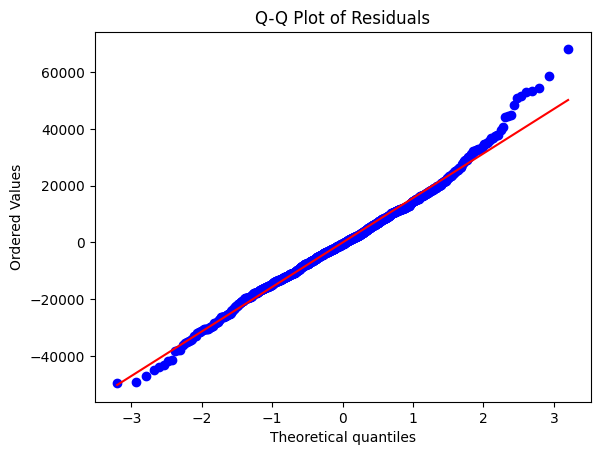

In [80]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


Checking feature Importance

In [81]:
list2 =  X.columns

In [82]:
list2 = list(list2)

In [83]:
len(list2)

90

In [84]:
X2

,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Condition1,Condition2,OverallQual,...,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LivQual,RoadFaceLot
0,65.0,8450,2,4,2,4,0,5,5,7,...,0,0,0,1,0,0,0,0,11970,0.007692
1,80.0,9600,2,4,2,4,0,3,5,6,...,0,1,0,0,0,0,0,0,7572,0.008333
2,68.0,11250,2,3,2,4,0,5,5,7,...,0,0,0,1,0,0,0,0,12502,0.006044
3,60.0,9550,2,3,2,4,0,5,5,7,...,0,0,0,0,0,0,0,0,12019,0.006283
4,84.0,14260,2,3,2,4,0,5,5,8,...,0,1,0,0,0,0,0,0,17584,0.005891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,2,4,2,4,0,5,5,6,...,0,0,0,1,0,0,0,0,9882,0.007831
1456,85.0,13175,2,4,2,4,0,5,5,6,...,0,0,0,1,0,0,0,0,12438,0.006452
1457,66.0,9042,2,4,2,4,0,5,5,7,...,0,0,0,1,0,0,0,0,16380,0.007299
1458,68.0,9717,2,4,2,4,0,5,5,5,...,0,0,0,1,0,0,0,0,5390,0.006998


# Trying Ridge Regression

In [216]:
nano1 = X2.columns

In [217]:
nano1 = list(nano1)

In [223]:
from sklearn.linear_model import Ridge

scaler2 = StandardScaler()
X_scaled1 = scaler2.fit_transform(X2)  # Standardize features


#X2 = X2.drop(['TotalSF'], axis = 1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y, test_size=0.2, random_state=62)


In [224]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Fit an OLS model to calculate Cook's Distance
X_train_sm = sm.add_constant(X_train1)
model = sm.OLS(y_train1, X_train_sm).fit()
influence = OLSInfluence(model)

# Get Cook's Distance
cooks_d = influence.cooks_distance[0]

# Identify high influence points (threshold = 4/n)
influential_points = cooks_d > (4 / len(X_train1))
print("Number of Influential Points:", sum(influential_points))


Number of Influential Points: 37


In [226]:
ridge = Ridge(alpha=1)
ridge.fit(X_train1, y_train1)
#ridge.fit(X_scaled1, y)
print(f"Ridge Score:{ridge.score(X_test1, y_test1)}")

Ridge Score:0.9023205582554853


In [225]:
import numpy as np
import statsmodels.api as sm

# Fit your model
X_train_const = sm.add_constant(X_train1)  # Add intercept
model = sm.OLS(y_train1, X_train_const).fit()

# Get Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Define threshold (4/n)
threshold = 4 / len(X_train1)

# Identify influential points
influential_points = np.where(cooks_d > threshold)[0]

# Display influential points
print(f"Influential points (Cook’s D > {threshold}): {len(influential_points)} observations")
print(influential_points)

# Remove these points from training data
X_train1 = X_train1.drop(X_train1.index[influential_points])
y_train1 = y_train1.drop(y_train1.index[influential_points])
#df = df.drop(df.index[influential_points])  


Influential points (Cook’s D > 0.0036496350364963502): 37 observations
[  25   58   65   66   96  105  152  154  228  229  236  268  281  292
  333  399  412  415  461  542  544  563  638  680  693  709  741  819
  829  920  922  967 1023 1025 1052 1055 1084]


In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 9,10,11,12,220,50,99,100,105,110,130, 145,150,151,172,450,460,470,480,490,495,500,1000]}
grid = GridSearchCV(ridge, params, cv=5)
grid.fit(X_train1, y_train1)

print("Best alpha:", grid.best_params_['alpha'])

Best alpha: 1


Importing and preprocessing our test data

In [204]:
test_path = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'

In [205]:
test_df = pd.read_csv(test_path)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [206]:
test_df['Neighborhood']

0         NAmes
1         NAmes
2       Gilbert
3       Gilbert
4       StoneBr
         ...   
1454    MeadowV
1455    MeadowV
1456    Mitchel
1457    Mitchel
1458    Mitchel
Name: Neighborhood, Length: 1459, dtype: object

In [207]:
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))


In [208]:
#test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df['HasBasement'] = (test_df['TotalBsmtSF'] > 0).astype(int)
test_df['HasGarage'] = (test_df['GarageArea'] > 0).astype(int)
test_df['HasFireplace'] = (test_df['Fireplaces'] > 0).astype(int)
test_df = pd.get_dummies(test_df, columns=['Neighborhood', 'HouseStyle', 'SaleCondition','RoofStyle'], drop_first=True)
test_df['MSSubClass'] = test_df['MSSubClass'].astype(str)  # Convert to categorical
test_df = pd.get_dummies(test_df, columns=['MSSubClass','MSZoning','LotConfig','BldgType'], drop_first=True)  # One-hot encode

#test_df = pd.get_dummies(test_df, columns=['Neighborhood', 'HouseStyle', 'SaleCondition'], drop_first=True)
quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
test_df['ExterQual'] = test_df['ExterQual'].map(quality_map)
test_df['KitchenQual'] = test_df['KitchenQual'].map(quality_map)
test_df["TotalBath"] = test_df["FullBath"] + (0.5 * test_df["HalfBath"] + test_df["BsmtFullBath"] + (0.5 * test_df["BsmtHalfBath"]))
test_df["HouseAge"] = test_df["YrSold"] - test_df["YearBuilt"]
test_df["GarageAge"] = test_df["YrSold"] - test_df["GarageYrBlt"]



In [209]:
test_df['Utilities'] = test_df['Utilities'].fillna('ELO')

In [210]:
quality_map_2 = {'Y':1,'N':0}
test_df['CentralAir'] = test_df['CentralAir'].map(quality_map_2)

quality_map_3 =  {'Y':3,'P':2,'N':1}
test_df['PavedDrive'] = test_df['PavedDrive'].map(quality_map_3)

quality_map_4 = {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}
test_df['Utilities'] = test_df['Utilities'].map(quality_map_4)

quality_map_5 = {'Grvl':1,'Pave':2}
test_df['Street'] = test_df['Street'].map(quality_map_5)

quality_map_6 = {'Reg':4,'IR1':3,'IR2':2,'IR3':1}
test_df['LotShape']=test_df['LotShape'].map(quality_map_6)

quality_map_7 = {'Lvl': 2, 'Bnk': 1, 'HLS': 4, 'Low': 3}
test_df['LandContour'] = test_df['LandContour'].map(quality_map_7)

quality_map_8 = {'Gtl': 0, 'Mod': 1, 'Sev': 2}  
test_df['LandSlope'] = test_df['LandSlope'].map(quality_map_8)

quality_map_9 = {'Artery': 1, 'RRAe': 2,'Feedr':3,'RRAn':4,'Norm':5,'RRNe':6,'RRNn':7,'PosN':8,'PosA':9}  
test_df['Condition1'] = test_df['Condition1'].map(quality_map_9)

quality_map_10 = {'Artery': 2, 'RRAe': 6,'Feedr':3,'RRAn':4,'Norm':5,'RRNe':6,'RRNn':1,'PosN':8,'PosA':9}  
test_df['Condition2'] = test_df['Condition2'].map(quality_map_10)

In [211]:
test_df['BsmtCond']=test_df['OverallCond'] * test_df['TotalBsmtSF'] 
test_df['LivQual']=test_df['OverallQual'] * test_df['GrLivArea']
test_df['RoadFaceLot'] = test_df['LotFrontage'] / test_df['LotArea'] 

In [212]:
print(test_df.dtypes.value_counts())

bool       67
int64      40
object     24
float64    16
Name: count, dtype: int64


In [213]:
bool_cols = test_df.select_dtypes(include=['bool']).columns
for i in bool_cols:
    test_df[i] = test_df[i].astype(int)

In [214]:
X_supertest1 = test_df[list2]

KeyError: "['TotalSF'] not in index"

In [218]:
X_supertest2 = test_df[nano1]

cols_to_drop = ['ExterQual', 'KitchenQual', 'GarageAge', 
                'MSSubClass_20', 'MSSubClass_45', 'MSSubClass_60', 
                'MSSubClass_80', 'MSSubClass_85', 'MSZoning_FV']

#X_supertest2.drop(columns=cols_to_drop, inplace=True)


In [109]:
print(X_supertest2.dtypes.value_counts())


int64      105
float64     17
Name: count, dtype: int64


Applying the Same PCA transformation on our test data

In [110]:
import joblib

joblib.dump(pca, "pca_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# --- When You Have a Separate Test Set ---
# Load the saved PCA model and scaler
scaler = joblib.load("scaler.pkl")
pca = joblib.load("pca_model.pkl")

In [111]:
X_supertest2.isnull().sum()

LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
                  ..
BldgType_Duplex    0
BldgType_Twnhs     0
BldgType_TwnhsE    0
LivQual            0
RoadFaceLot        0
Length: 122, dtype: int64

In [112]:
X_supertest1 = X_supertest1.fillna(X_supertest1.mean())

Predicting Linear Regression Model with PCA

In [113]:
X_supertest1

,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Condition1,Condition2,OverallQual,...,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LivQual,RoadFaceLot
0,80.0,11622,2,4,2,4,0,3,5,5,...,0,0,0,0,0,1,0,0,4480,0.006883
1,81.0,14267,2,3,2,4,0,5,5,6,...,0,0,0,0,0,0,1,0,7974,0.005677
2,74.0,13830,2,3,2,4,0,5,5,5,...,0,0,0,0,0,0,1,0,8145,0.005351
3,78.0,9978,2,3,2,4,0,5,5,6,...,0,0,0,0,0,0,1,0,9624,0.007817
4,43.0,5005,2,3,4,4,0,5,5,8,...,0,0,0,0,0,0,1,0,10240,0.008591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,2,4,2,4,0,5,5,4,...,0,0,0,0,0,0,0,1,4368,0.010847
1455,21.0,1894,2,4,2,4,0,5,5,4,...,0,0,0,0,0,0,0,1,4368,0.011088
1456,160.0,20000,2,4,2,4,0,5,5,5,...,0,0,0,0,0,0,1,0,6120,0.008000
1457,62.0,10441,2,4,2,4,0,5,5,5,...,0,0,1,0,0,0,1,0,4850,0.005938


In [114]:
y_pred_lr = lrmodel.predict(X_supertest1)

In [115]:
pca_pred = pd.DataFrame()
pca_pred['Id'] = test_df['Id']
pca_pred['SalePrice'] = y_pred_lr

In [116]:
pca_pred

,Id,SalePrice
0,1461,2.567604e+08
1,1462,1.832314e+08
2,1463,3.022789e+08
3,1464,2.155550e+08
4,1465,1.047580e+08
...,...,...
1454,2915,3.708255e+07
1455,2916,3.613774e+07
1456,2917,4.420091e+08
1457,2918,2.211125e+08


In [200]:
pca_pred.to_csv('LR_PCA_Prediction_5_fill(med).csv', index=False)

Using test data to get predictions 

#  Ridge Prediction

In [219]:
X_supertest2.isnull().sum().sort_values(ascending = False)

GarageAge       78
GarageYrBlt     78
MasVnrArea      15
TotalBath        2
BsmtFullBath     2
                ..
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
RoadFaceLot      0
Length: 121, dtype: int64

In [227]:
X_supertest2 = X_supertest2.fillna(X_supertest2.mean())

#X_test_scaled = scaler2.fit_transform(X_supertest2)
#X_supertest1.isnull().sum()
y_pred_ridge = ridge.predict(X_supertest2)

In [228]:
ridge_pred = pd.DataFrame()
ridge_pred['Id'] = test_df['Id']
ridge_pred['SalePrice'] = y_pred_ridge

In [229]:
ridge_pred

,Id,SalePrice
0,1461,110883.655364
1,1462,166034.171055
2,1463,174438.120715
3,1464,194362.572363
4,1465,193188.677212
...,...,...
1454,2915,54454.070854
1455,2916,80520.921929
1456,2917,171923.185935
1457,2918,88724.982251


In [230]:

ridge_pred.to_csv('Ridge_Prediction_15_fill(mean).csv', index=False)

# Using Lasso Regression

In [233]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train1, y_train1)

y_lasso_pred = lasso.predict(X_test1)
print(f"Lasso RMSE: {mean_squared_error(y_test1, y_lasso_pred, squared=False):.2f}")
print(f"Ridge Score:{lasso.score(X_test1, y_test1)}")

Lasso RMSE: 23905.02
Ridge Score:0.9005971569259239


In [232]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10,20,30, 100,120,200,230,260,300,305,800,1000,1020,1025,1030,1490,1480,1500.1600,1700,2000,2010,4310], cv=5)  # Define range of alphas
lasso_cv.fit(X_train, y_train)

print("Best alpha:", lasso_cv.alpha_)  # Get the best alpha


Best alpha: 1.0


In [234]:
#Predictions

y_test_pred_lasso = lasso.predict(X_supertest2)

In [235]:
o = len(y_test_pred_lasso)
o

1459

In [236]:
#y_test_pred_lasso
import numpy as np
Id = test_df['Id']
Id.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [237]:
lasso_pred = pd.DataFrame()
lasso_pred['Id'] = test_df['Id']
lasso_pred['SalePrice'] = y_test_pred_lasso

In [238]:
lasso_pred1 = lasso_pred[['Id','SalePrice']]

In [239]:
lasso_pred1.to_csv('Lasso_Prediction_12_fill(mean).csv', index=False)

# Extracting Feature Importance Through RandomForestRegressor

In [125]:
import pandas as pd
X_train_df = pd.DataFrame(X_train1)  # Use the actual feature names


In [240]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train1, y_train1)

feature_importances = pd.Series(rf.feature_importances_, index=X2.columns)
print(feature_importances.sort_values(ascending=False).head(10))


LivQual         0.742315
TotalBsmtSF     0.035645
BsmtCond        0.030112
BsmtFinSF1      0.023891
HouseAge        0.017018
GarageCars      0.013585
YearBuilt       0.012344
1stFlrSF        0.011307
YearRemodAdd    0.008680
LotArea         0.007496
dtype: float64


In [241]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
rfr_model = RandomForestRegressor(max_depth= None, min_samples_leaf= 2, min_samples_split=5, n_estimators= 250,max_features= 'sqrt')


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=62)


rfr_model.fit(X_train2, y_train2)

# Predictions
y_pred = rfr_model.predict(X_test2)

# Model Evaluation
mae = mean_absolute_error(y_test2, y_pred)
mse = mean_squared_error(y_test2, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 16702.680573058547
RMSE: 25717.318787269334
R2 Score: 0.884953915839519


In [324]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# **Hyperparameter Grid**
param_grid = {
    "n_estimators": [200,300,250,350],  # Number of trees
    "max_depth": [None, 15, 30],  # Maximum depth of tree
    "min_samples_split": [2, 5],  # Minimum samples to split a node
    "min_samples_leaf": [2,5],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(rfr_model, param_grid,cv=3, scoring="r2", n_jobs=-1, verbose=2)
grid_search.fit(X_train2, y_train2)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")



Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [312]:
best_rf = grid_search.best_estimator_

In [134]:
y_pred_rfr = rfr_model.predict(X_test_scaled)

In [135]:
rfr_pred = pd.DataFrame()
rfr_pred['Id'] = test_df['Id']
rfr_pred['SalePrice'] = y_pred_rfr

In [138]:
rfr_pred.to_csv('Random_Forest_4_fill(mean).csv', index=False)

In [137]:
rfr_pred

,Id,SalePrice
0,1461,123151.173333
1,1462,167853.566667
2,1463,183461.873333
3,1464,191774.463333
4,1465,200236.526667
...,...,...
1454,2915,105917.846667
1455,2916,105743.790000
1456,2917,176304.746667
1457,2918,141244.503333


Polynomial Regression

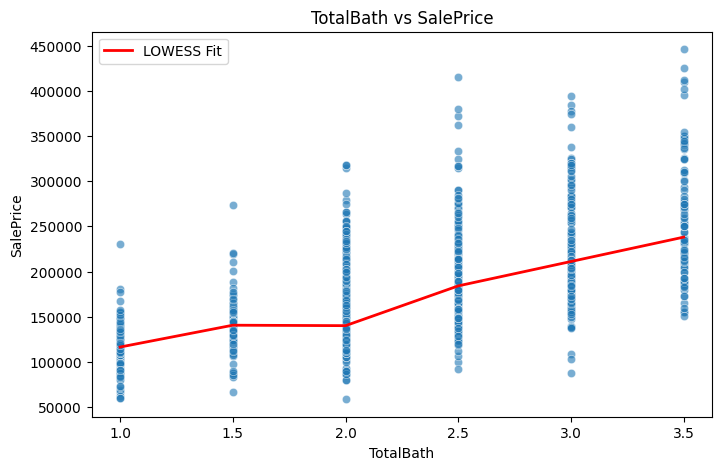

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a numerical feature (e.g., OverallQual)
feature = 'TotalBath'

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train[feature], y=y_train, alpha=0.6)

# Fit a LOWESS curve (locally weighted regression) to check non-linearity
import statsmodels.api as sm
lowess = sm.nonparametric.lowess(y_train, X_train[feature], frac=0.3)
plt.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2, label="LOWESS Fit")

plt.xlabel(feature)
plt.ylabel("SalePrice")
plt.title(f"{feature} vs SalePrice")
plt.legend()
plt.show()


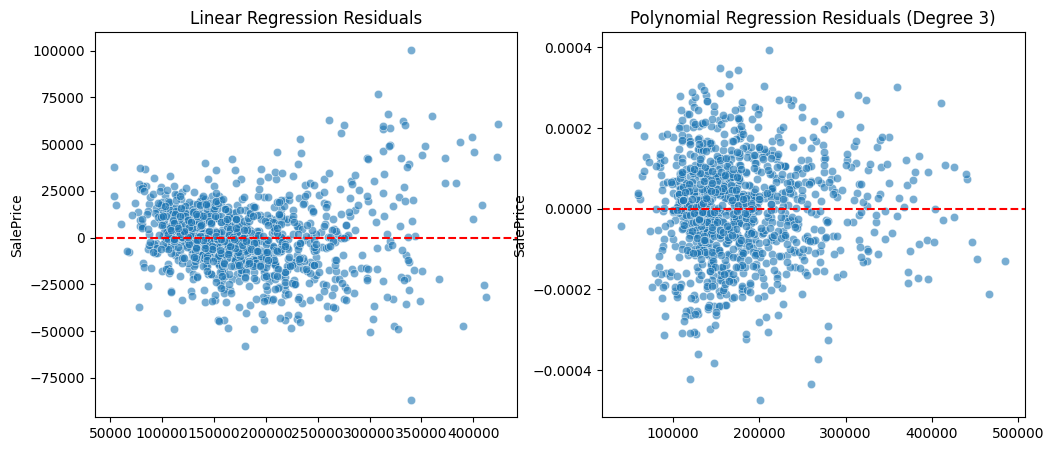

In [269]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Fit Linear Model
linear_model = LinearRegression().fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_train)
residuals_linear = y_train - y_pred_linear

# Fit Polynomial Model
degree = 3  # You can tune this
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_train)
residuals_poly = y_train - y_pred_poly

# Plot Residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=y_pred_linear, y=residuals_linear, alpha=0.6, ax=axes[0])
axes[0].axhline(y=0, color='red', linestyle='dashed')
axes[0].set_title("Linear Regression Residuals")

sns.scatterplot(x=y_pred_poly, y=residuals_poly, alpha=0.6, ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='dashed')
axes[1].set_title(f"Polynomial Regression Residuals (Degree {degree})")

plt.show()


In [139]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = {"Lasso": lasso, "Ridge": ridge, "Random Forest": rfr_model}

for name, model in models.items():
    y_pred = model.predict(X_test1)
    print(f"{name} R² Score: {r2_score(y_test1, y_pred):.4f}")
    print(f"{name} MAE: {mean_absolute_error(y_test1, y_pred):.4f}")
    print(f"{name} RMSE: {mean_squared_error(y_test1, y_pred, squared=False):.4f}\n")


Lasso R² Score: 0.9002
Lasso MAE: 15634.0491
Lasso RMSE: 23949.1857

Ridge R² Score: 0.9012
Ridge MAE: 15570.0656
Ridge RMSE: 23831.4449

Random Forest R² Score: 0.8936
Random Forest MAE: 16512.1938
Random Forest RMSE: 24734.5720



Elastic Net Model 

In [140]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
elastic_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # Lasso-Ridge balance
}

# Initialize Elastic Net model
elastic = ElasticNet(max_iter=5000)

# Grid Search
grid_elastic = GridSearchCV(elastic, elastic_params, cv=5, scoring='r2', n_jobs=-1)
grid_elastic.fit(X_train1, y_train1)

# Best hyperparameters
print("Best Elastic Net Alpha:", grid_elastic.best_params_['alpha'])
print("Best Elastic Net L1 Ratio:", grid_elastic.best_params_['l1_ratio'])

# Best model
best_elastic = grid_elastic.best_estimator_


Best Elastic Net Alpha: 0.01
Best Elastic Net L1 Ratio: 0.9


In [141]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict on test set
y_pred_elastic = best_elastic.predict(X_test1)

# Metrics
print(f"Elastic Net R2 Score: {r2_score(y_test1, y_pred_elastic):.4f}")
print(f"Elastic Net MAE: {mean_absolute_error(y_test1, y_pred_elastic):.4f}")
print(f"Elastic Net RMSE: {mean_squared_error(y_test1, y_pred_elastic, squared=False):.4f}")


Elastic Net R2 Score: 0.8997
Elastic Net MAE: 15615.1760
Elastic Net RMSE: 24008.3136


In [317]:
y_pred_EN = best_elastic.predict(X_supertest2)

In [318]:
EN_pred = pd.DataFrame()
EN_pred['Id'] = test_df['Id']
EN_pred['SalePrice'] = y_pred_EN

In [319]:
EN_pred

,Id,SalePrice
0,1461,112116.287165
1,1462,172845.904535
2,1463,178037.791447
3,1464,196786.409954
4,1465,190222.328274
...,...,...
1454,2915,71006.524129
1455,2916,76331.928607
1456,2917,170182.965432
1457,2918,109712.787679


In [320]:
EN_pred.to_csv('Elastic_Net_3_fill(mean).csv', index=False)

XG Boost Algorithm

In [263]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [264]:
xgb_regressor = xgb.XGBRegressor(
    objective="reg:squarederror",  
    random_state=42
)



xgb_regressor.fit(X_train2, y_train2)

# Predictions
y_pred_xgb = xgb_regressor.predict(X_test2)

# Metrics
print(f"XGBoost R² Score: {r2_score(y_test2, y_pred_xgb):.4f}")
print(f"XGBoost MAE: {mean_absolute_error(y_test2, y_pred_xgb):.4f}")
print(f"XGBoost RMSE: {mean_squared_error(y_test2, y_pred_xgb, squared=False):.4f}")


XGBoost R² Score: 0.8661
XGBoost MAE: 18810.4057
XGBoost RMSE: 27746.3265


In [148]:
y_pred_XGBoost = best_elastic.predict(X_supertest2)

In [149]:
XG_pred = pd.DataFrame()
XG_pred['Id'] = test_df['Id']
XG_pred['SalePrice'] = y_pred_XGBoost

In [150]:
XG_pred

,Id,SalePrice
0,1461,112116.287165
1,1462,172845.904535
2,1463,178037.791447
3,1464,196786.409954
4,1465,190222.328274
...,...,...
1454,2915,71006.524129
1455,2916,76331.928607
1456,2917,170182.965432
1457,2918,109712.787679


In [151]:
XG_pred.to_csv('XG_Boost_1_fill(mean).csv', index=False)

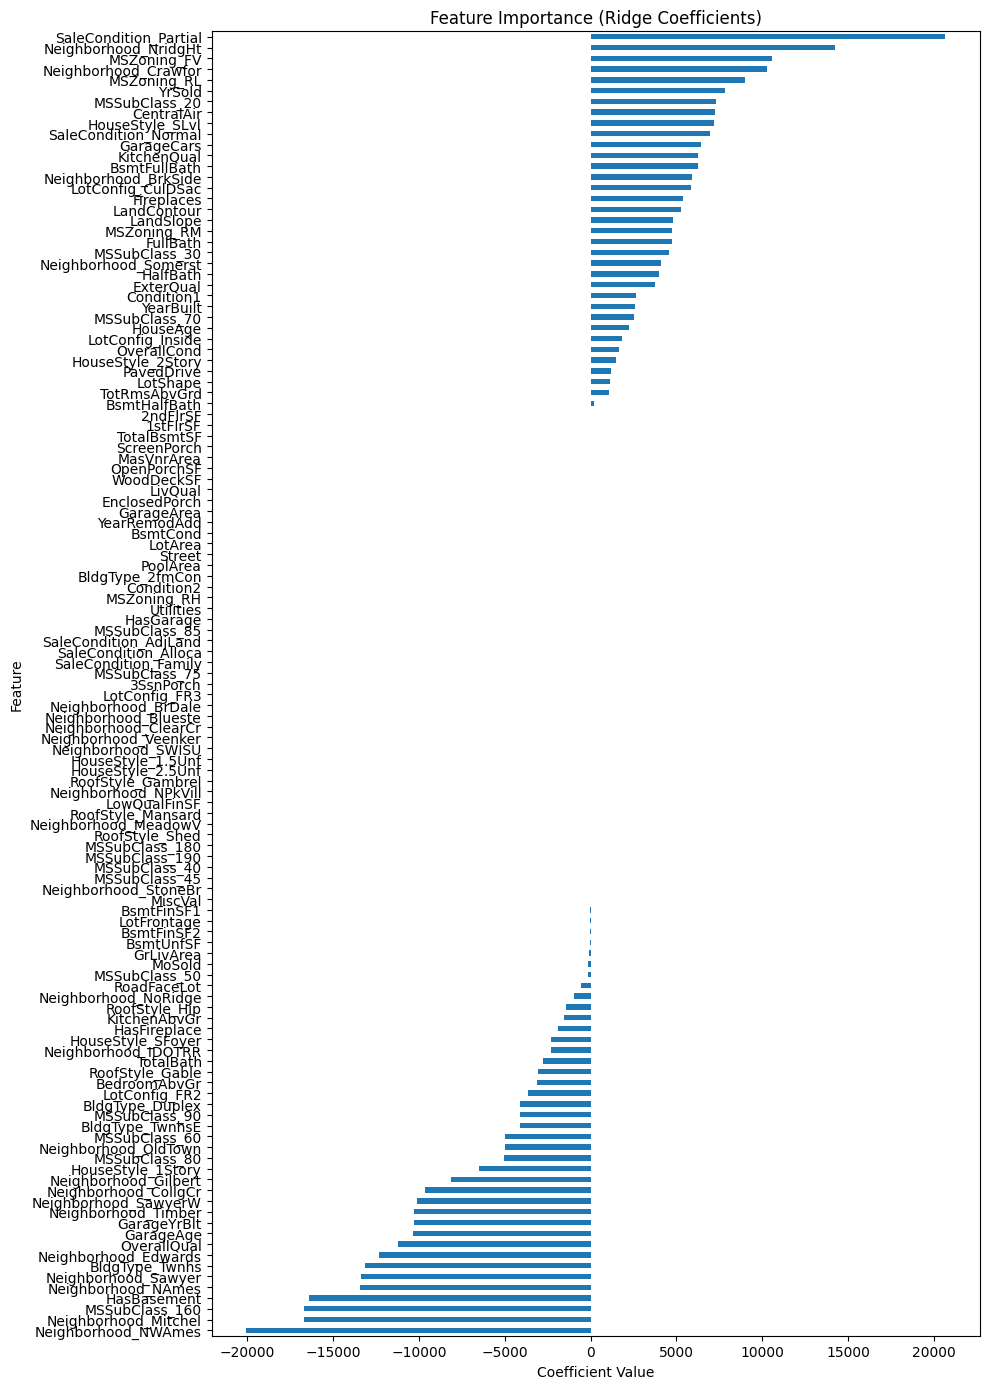

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

coefs = pd.Series(ridge.coef_, index=X2.columns)
coefs = coefs.sort_values()

plt.figure(figsize=(10, 14))
coefs.plot(kind='barh')
plt.title("Feature Importance (Ridge Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


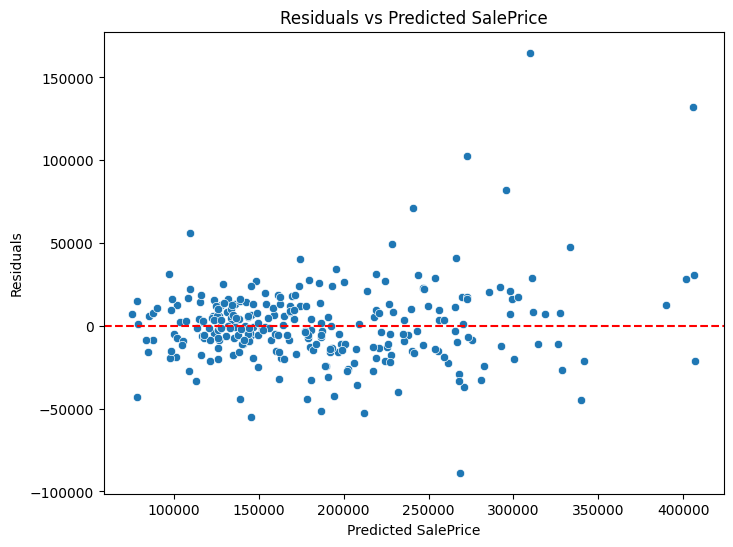

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = lrmodel.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted SalePrice")
plt.show()


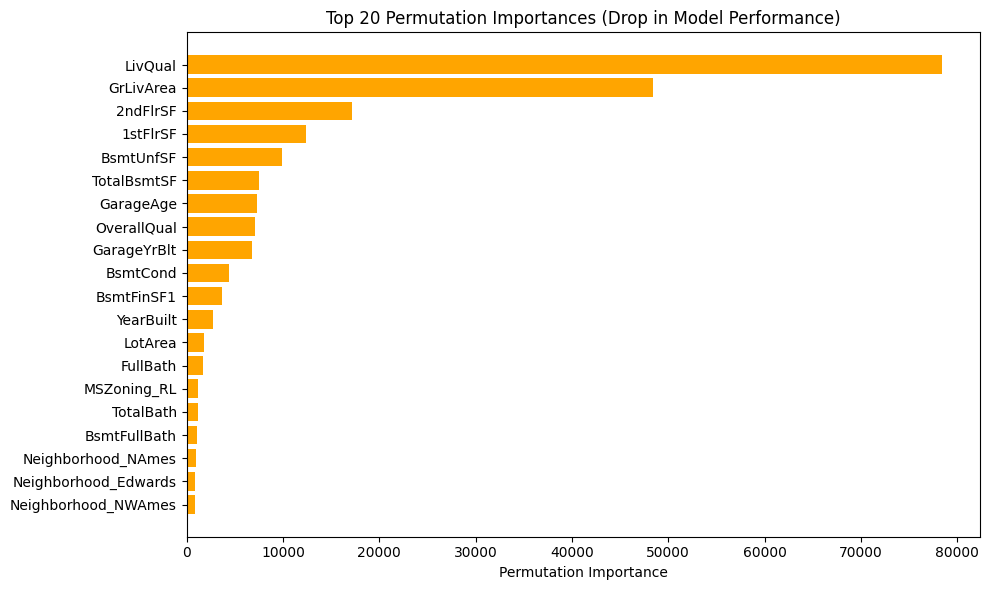

In [273]:
from sklearn.inspection import permutation_importance

results = permutation_importance(lasso, X_test1, y_test1, scoring='neg_root_mean_squared_error', n_repeats=10, random_state=42)

perm_importance = pd.DataFrame({
    'Feature': X_test1.columns,
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(perm_importance['Feature'][:20][::-1], perm_importance['Importance'][:20][::-1], color='orange')
plt.xlabel('Permutation Importance')
plt.title('Top 20 Permutation Importances (Drop in Model Performance)')
plt.tight_layout()
plt.show()


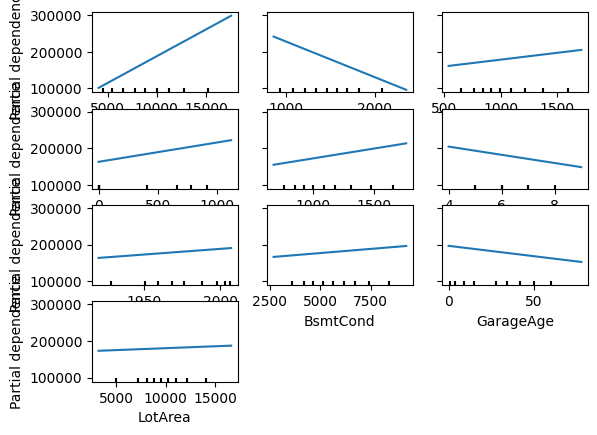

In [246]:
from sklearn.inspection import PartialDependenceDisplay

features = [

    'LivQual',
    'GrLivArea',
    'TotalBsmtSF',
    '2ndFlrSF',
    '1stFlrSF',
    'OverallQual',
    'YearBuilt',
    'BsmtCond',
  #  'TotalSF',
    'GarageAge', 
    'LotArea'
]

PartialDependenceDisplay.from_estimator(lasso, X_train1, features, feature_names=X2.columns.tolist(), grid_resolution=10)



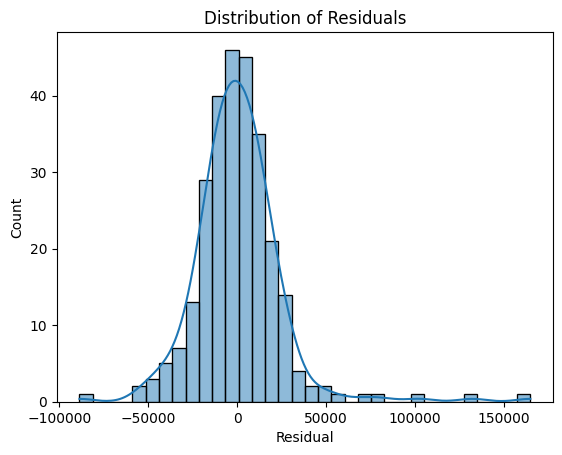

In [169]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()


In [175]:
import pandas as pd
import numpy as np

# Assuming you have lasso model and feature names
coef = pd.Series(lasso.coef_, index=X2.columns)
top_features = coef.abs().sort_values(ascending=False).head(25).index
top_coef = coef[top_features]


In [176]:
top_coef

SaleCondition_Partial    20083.096954
MSSubClass_160          -17553.803157
Neighborhood_NridgHt     16368.231862
Neighborhood_NWAmes     -15075.268931
HasBasement             -13594.248236
HouseStyle_SLvl          13481.926912
Neighborhood_Mitchel    -13436.452412
Neighborhood_Edwards    -13383.968869
Neighborhood_Crawfor     12595.696427
OverallQual             -11928.681347
MSSubClass_80           -11780.200582
Neighborhood_NAmes      -10193.620764
BldgType_Twnhs          -10096.972323
MSZoning_RL               9919.210250
Neighborhood_Somerst      9348.216226
MSZoning_FV               8892.301351
SaleCondition_Normal      8746.216381
Neighborhood_SawyerW     -8271.383974
MSSubClass_90            -7748.884383
Neighborhood_CollgCr     -7214.392224
MSSubClass_70             6977.720904
Neighborhood_BrkSide      6929.108337
Neighborhood_Sawyer      -6925.480929
MSSubClass_60            -6839.642237
HouseStyle_2Story         6200.362407
dtype: float64

In [187]:
X2[['GrLivArea', 'TotalSF', '1stFlrSF', 'OverallQual']].corr()


,GrLivArea,TotalSF,1stFlrSF,OverallQual
GrLivArea,1.000000,0.862052,0.504957,0.587994
TotalSF,0.862052,1.000000,0.775291,0.673797
1stFlrSF,0.504957,0.775291,1.000000,0.458845
OverallQual,0.587994,0.673797,0.458845,1.000000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

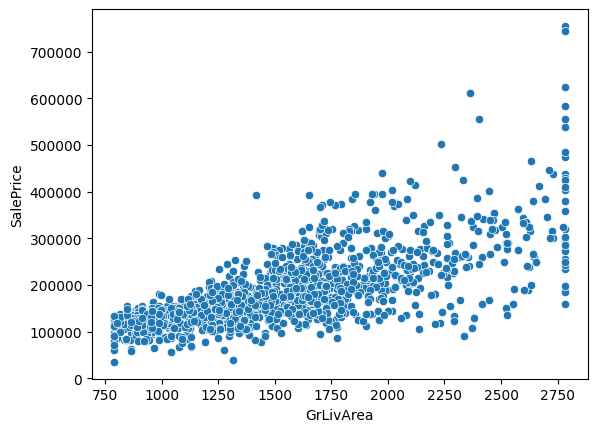

In [249]:
import seaborn as sns
sns.scatterplot(x=X2['GrLivArea'], y=data['SalePrice'])


In [270]:
from sklearn.inspection import permutation_importance

# Example for Lasso
lasso_result = permutation_importance(lasso, X_test1, y_test, n_repeats=10, random_state=42)
lasso_importances = pd.Series(lasso_result.importances_mean, index=X_test1.columns).sort_values(ascending=False)
top_lasso = lasso_importances.head(15).index.tolist()

# Repeat for Ridge, RFR, XGB:
ridge_result = permutation_importance(ridge, X_test1, y_test1, n_repeats=10, random_state=42)
top_ridge = pd.Series(ridge_result.importances_mean, index=X_test1.columns).sort_values(ascending=False).head(15).index.tolist()

rfr_result = permutation_importance(rfr_model, X_test2, y_test2, n_repeats=10, random_state=42)
top_rf = pd.Series(rfr_result.importances_mean, index=X_test2.columns).sort_values(ascending=False).head(15).index.tolist()

xgb_result = permutation_importance(xgb_regressor, X_test2, y_test2, n_repeats=10, random_state=42)
top_xgb = pd.Series(xgb_result.importances_mean, index=X_test2.columns).sort_values(ascending=False).head(15).index.tolist()


In [271]:
all_features = list(set(top_lasso + top_ridge + top_rf + top_xgb))

In [272]:
importance_table = pd.DataFrame({
    'Feature': all_features,
    'Lasso': [1 if f in top_lasso else 0 for f in all_features],
    'Ridge': [1 if f in top_ridge else 0 for f in all_features],
    'RandomForest': [1 if f in top_rf else 0 for f in all_features],
    'XGBoost': [1 if f in top_xgb else 0 for f in all_features],
})

# Optional: Make it more readable
importance_table = importance_table.sort_values(by=['Lasso', 'Ridge', 'RandomForest', 'XGBoost'], ascending=False)

# Display
importance_table.replace({1: '✅', 0: ''})



,Feature,Lasso,Ridge,RandomForest,XGBoost
1,TotalBsmtSF,✅,✅,✅,✅
6,BsmtCond,✅,✅,✅,✅
8,GrLivArea,✅,✅,✅,✅
10,LotArea,✅,✅,✅,✅
17,LivQual,✅,✅,✅,✅
19,BsmtFinSF1,✅,✅,✅,✅
22,OverallQual,✅,✅,✅,✅
24,1stFlrSF,✅,✅,✅,
3,BsmtUnfSF,✅,✅,,✅
11,YearBuilt,✅,✅,,✅
